### Importing libraries

In [1]:

#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Loading  the adult income dataset

In [2]:
df=pd.read_csv("adult income.csv")

### Checking the dataframe for datatype

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


###  Checking for missing values

In [4]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Checking the first few rows

In [5]:
df.head().T

,0,1,2,3,4
age,25,38,28,44,18
workclass,Private,Private,Local-gov,Private,?
fnlwgt,226802,89814,336951,160323,103497
education,11th,HS-grad,Assoc-acdm,Some-college,Some-college
educational-num,7,9,12,10,10
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married
occupation,Machine-op-inspct,Farming-fishing,Protective-serv,Machine-op-inspct,?
relationship,Own-child,Husband,Husband,Husband,Own-child
race,Black,White,White,Black,White
gender,Male,Male,Male,Male,Female


####  We saw occupation listed as ?

### Checking numeric columns

In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Checking for number of unique values
    

In [7]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

### Histogram of columns

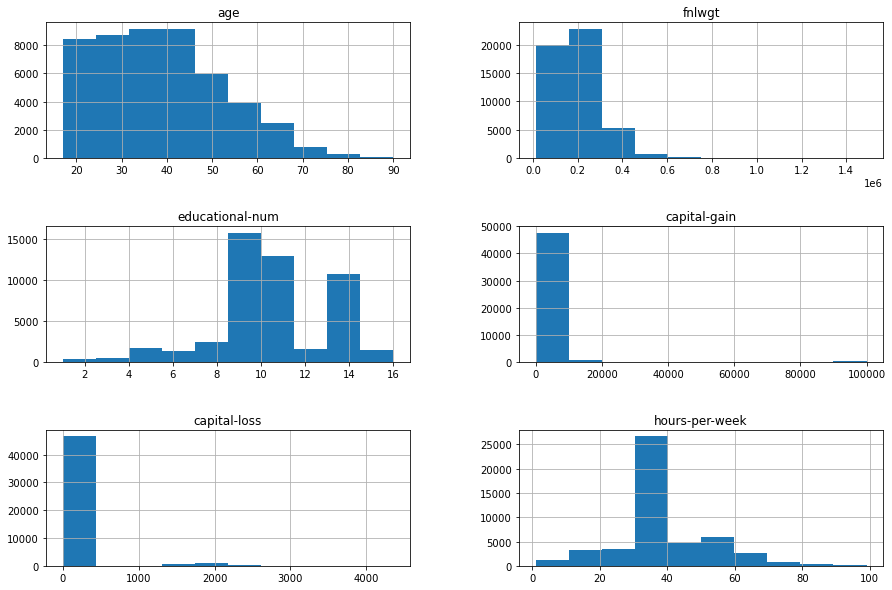

In [8]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [9]:

for col in df.columns:
    item_counts = df[col].value_counts(normalize=True)
    print('\033[1m'+ col,"\n",item_counts)

age 
 36    0.027599
35    0.027374
33    0.027333
23    0.027210
31    0.027128
        ...   
88    0.000123
85    0.000102
87    0.000061
89    0.000041
86    0.000020
Name: age, Length: 74, dtype: float64
workclass 
 Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64
fnlwgt 
 203488    0.000430
190290    0.000389
120277    0.000389
125892    0.000369
126569    0.000369
            ...   
188488    0.000020
285290    0.000020
293579    0.000020
114874    0.000020
257302    0.000020
Name: fnlwgt, Length: 28523, dtype: float64
education 
 HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th     

###  
1. Work Class has 5.7% values as ?
2. Occupation has 5.7% values as ?
3. Native Country has 1.7% values as ?
      

### Imputing "?" with most frequent values in the dataframe using Simple Imputer

In [10]:
columns=list(df.columns)
from sklearn.impute import SimpleImputer
SimpleImputer=SimpleImputer(missing_values="?",strategy='most_frequent')
result_most_frequent_imputer =SimpleImputer.fit_transform(df)
df1=pd.DataFrame(result_most_frequent_imputer, columns=columns)

   

In [11]:
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [18]:
list(df.education.unique())

['11th',
 'HS-grad',
 'Assoc-acdm',
 'Some-college',
 '10th',
 'Prof-school',
 '7th-8th',
 'Bachelors',
 'Masters',
 'Doctorate',
 '5th-6th',
 'Assoc-voc',
 '9th',
 '12th',
 '1st-4th',
 'Preschool']

### 1.  Impact of education on income

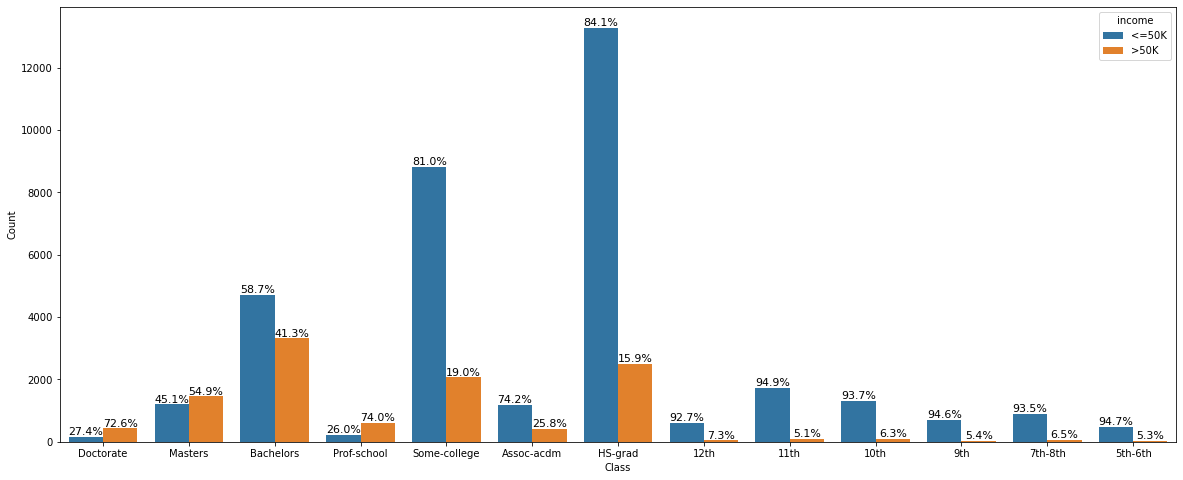

In [26]:
### https://stackoverflow.com/questions/69690399/how-to-add-percentages-on-countplot-in-seaborn
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

#df = sns.load_dataset("titanic")

plt.figure(figsize=(20, 8))
ax3 = sns.countplot(x="education",hue="income" ,order=["Doctorate","Masters","Bachelors","Prof-school","Some-college","Assoc-acdm","HS-grad","12th","11th","10th","9th","7th-8th","5th-6th"],data=df1)
ax3.set(xlabel='Class', ylabel='Count')

percentage_above_bar_relative_to_xgroup(ax3)
plt.show()

1. 84.1% of High School Gradutaes earn less than 50 K
2. As the educational level increases after highschool level of education the likelihood of getting salary higher than $ 50K is much higher
3. 72.6% of people with doctorate degree earn more than 50k

### 2. Marital Status


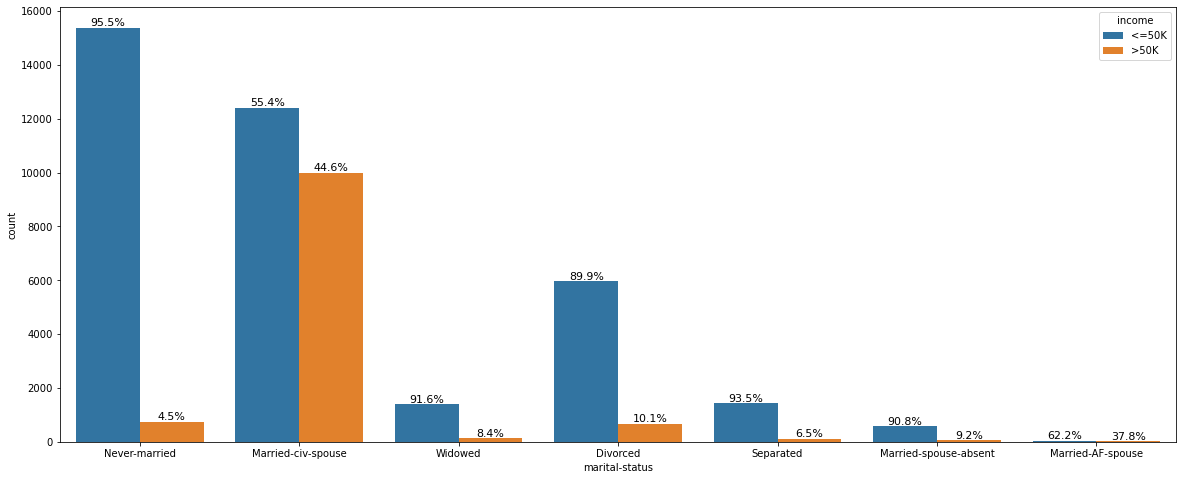

In [27]:
plt.figure(figsize=(20, 8))
ax3 = sns.countplot(x="marital-status",hue="income",data=df1)

percentage_above_bar_relative_to_xgroup(ax3)
plt.show()

1. Married people with spouse are more likely to earn more than 50k

### 3. Occupation

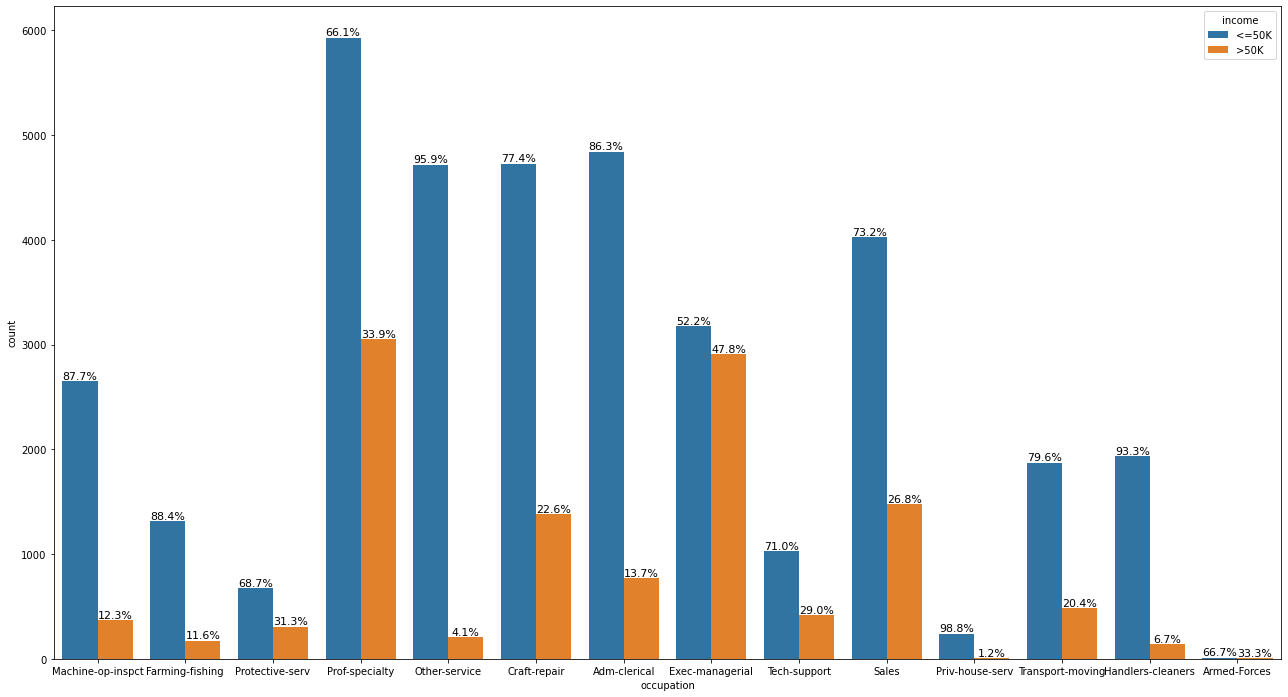

In [37]:
plt.figure(figsize=(22, 12))
ax3 = sns.countplot(x="occupation",hue="income",data=df1)

percentage_above_bar_relative_to_xgroup(ax3)
plt.show()

 Speciality and exceutive managerial level professionals have higher probablity of earning more than 50K

### 4. Gender

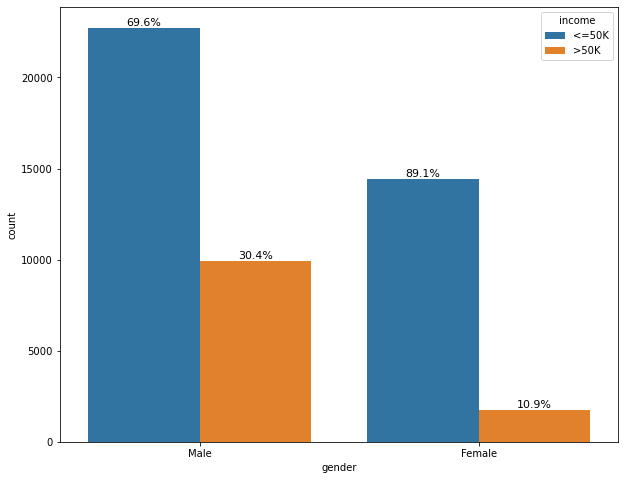

In [38]:
plt.figure(figsize=(10,8))
ax3 = sns.countplot(x="gender",hue="income",data=df1)

percentage_above_bar_relative_to_xgroup(ax3)
plt.show()

 Males are highly likely to get more than 50 k 

# Summary

The key findings from the adult income data set are listed below:

1. 84.1% of High School Gradutaes earn less than $50 K

2. As the educational level increases after highschool level of education the likelihood of getting salary higher than $ 50K is much higher

3. 72.6% of people with doctorate degree earn more than 50k

4. Speciality and exceutive managerial level professionals have higher probablity of earning more than $50K

5.Males are more likely to earn more than 50K. 30.4% males earn more than 50K, where as only 10.9% females earn more than 50K





